# McKinney Chapter 5 - Practice (Section 2, Wednesday 2:45 PM)

## Announcements

- Due on Friday, 2/3, at 11:59 PM
    - 10,000 Total XP ***submited to Gradescope as a PDF***
    - Quiz 2
- On Monday, 2/6, at 9 AM I will open groups on Canvas
- I will close the groups on Monday, 2/13, and randomly assign anyone left over

## Practice

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import yfinance as yf
import requests_cache

In [2]:
%config InlineBackend.figure_format = 'retina'
%precision 4
pd.options.display.float_format = '{:.4f}'.format
session = requests_cache.CachedSession()

In [3]:
tickers = yf.Tickers('AAPL IBM MSFT GOOG', session=session)
prices = tickers.history(period='max', auto_adjust=False, progress=False)
prices.index = prices.index.tz_localize(None)
returns = prices['Adj Close'].pct_change().dropna()
returns.columns.name = 'Ticker'

In [4]:
returns

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2004-08-20,0.0029,0.0794,0.0042,0.0029
2004-08-23,0.0091,0.0101,-0.0070,0.0044
2004-08-24,0.0280,-0.0414,0.0007,0.0000
2004-08-25,0.0344,0.0108,0.0042,0.0114
2004-08-26,0.0487,0.0180,-0.0045,-0.0040
...,...,...,...,...
2023-02-22,0.0029,-0.0027,-0.0056,-0.0046
2023-02-23,0.0033,-0.0080,-0.0014,0.0130
2023-02-24,-0.0180,-0.0189,-0.0017,-0.0218


### What are the mean daily returns for these four stocks?

In [5]:
returns.mean()

Ticker
AAPL   0.0015
GOOG   0.0010
IBM    0.0003
MSFT   0.0007
dtype: float64

### What are the standard deviations of daily returns for these four stocks?

In [6]:
returns.std()

Ticker
AAPL   0.0210
GOOG   0.0194
IBM    0.0144
MSFT   0.0173
dtype: float64

### What are the *annualized* means and standard deviations of daily returns for these four stocks?

In [7]:
returns.mean().mul(252)

Ticker
AAPL   0.3666
GOOG   0.2412
IBM    0.0803
MSFT   0.1824
dtype: float64

In [8]:
returns.std().mul(np.sqrt(252))

Ticker
AAPL   0.3328
GOOG   0.3087
IBM    0.2291
MSFT   0.2741
dtype: float64

***The best explanation I have found on why stock return volatility (the standard deviation of stocks returns) grows with the square root of time is at the bottom of page 7 of [chapter 8 of Ivo Welch's free corporate finance textbook](https://book.ivo-welch.info/read/source5.mba/08-invchoice.pdf).***

### Plot *annualized* means versus standard deviations of daily returns for these four stocks

Use `plt.scatter()`, which expects arguments as `x` (standard deviations) then `y` (means).

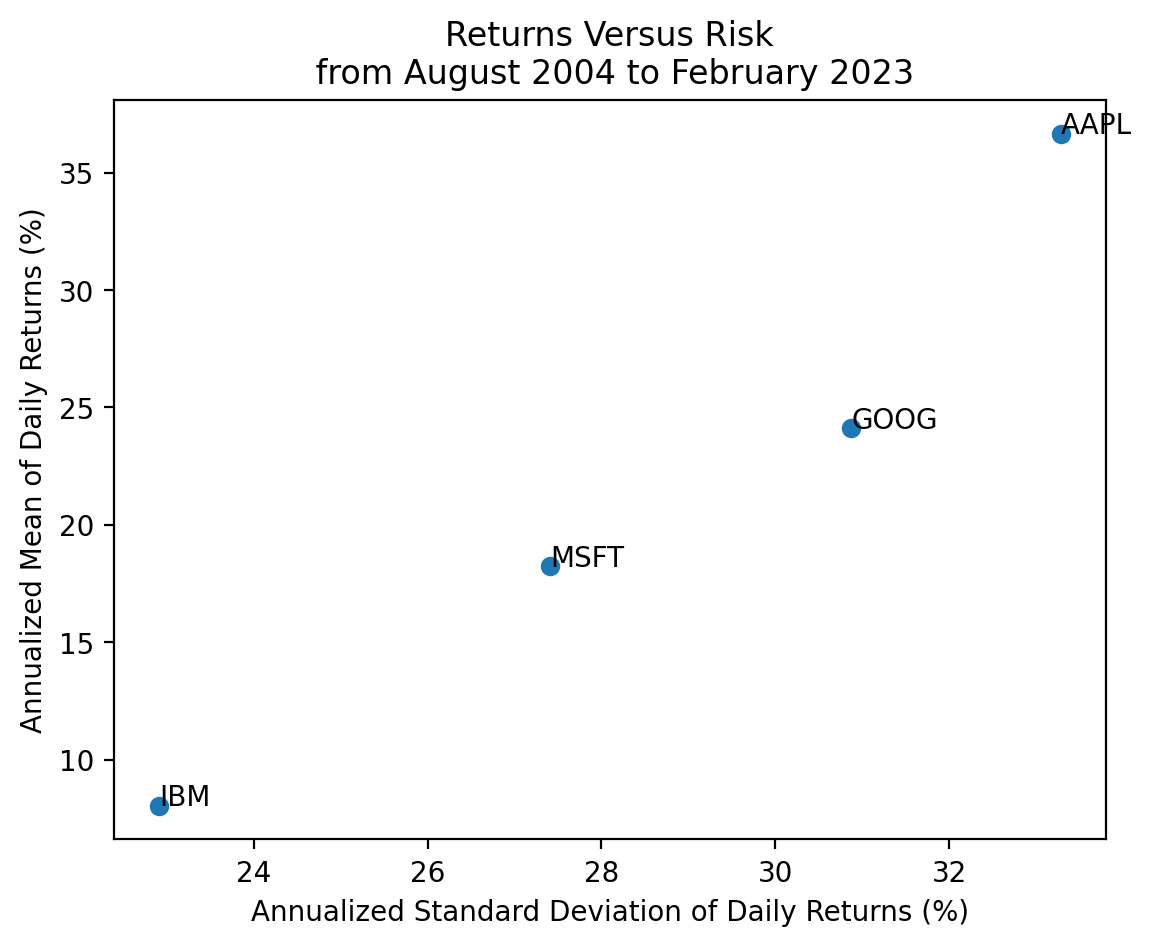

In [9]:
plt.scatter(
    x=returns.std() * np.sqrt(252) * 100,
    y=returns.mean() * 252 * 100
)
plt.xlabel('Annualized Standard Deviation of Daily Returns (%)')
plt.ylabel('Annualized Mean of Daily Returns (%)')
plt.title(f'Returns Versus Risk\n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')

for i in returns:
    plt.text(
        x=returns[i].std() * np.sqrt(252) * 100,
        y=returns[i].mean() * 252 * 100,
        s=i
    )
    
plt.show()

### Repeat the previous calculations and plot for the stocks in the Dow-Jones Industrial Average (DJIA)

We can find the current DJIA stocks on [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).
We will need to download new data, into `tickers2`, `prices2`, and `returns2`.

In [10]:
def returns_many(x):
    tickers = yf.Tickers(tickers=x, session=session)
    prices = tickers.history(period='max', auto_adjust=False, progress=False)
    prices.index = prices.index.tz_localize(None)
    returns = prices['Adj Close'].pct_change().dropna()
    returns.columns.name = 'Ticker'
    return returns

In [11]:
def plot_many(x):
    plt.scatter(
        x=x.std() * np.sqrt(252) * 100,
        y=x.mean() * 252 * 100
    )
    plt.xlabel('Annualized Standard Deviation of Daily Returns (%)')
    plt.ylabel('Annualized Mean of Daily Returns (%)')
    plt.title(f'Returns Versus Risk\n from {x.index[0]:%B %Y} to {x.index[-1]:%B %Y}')

    for i in x:
        plt.text(
            x=x[i].std() * np.sqrt(252) * 100,
            y=x[i].mean() * 252 * 100,
            s=i
        )

    plt.show()

In [12]:
wiki = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')

In [13]:
returns_2 = returns_many(wiki[1]['Symbol'].to_list())

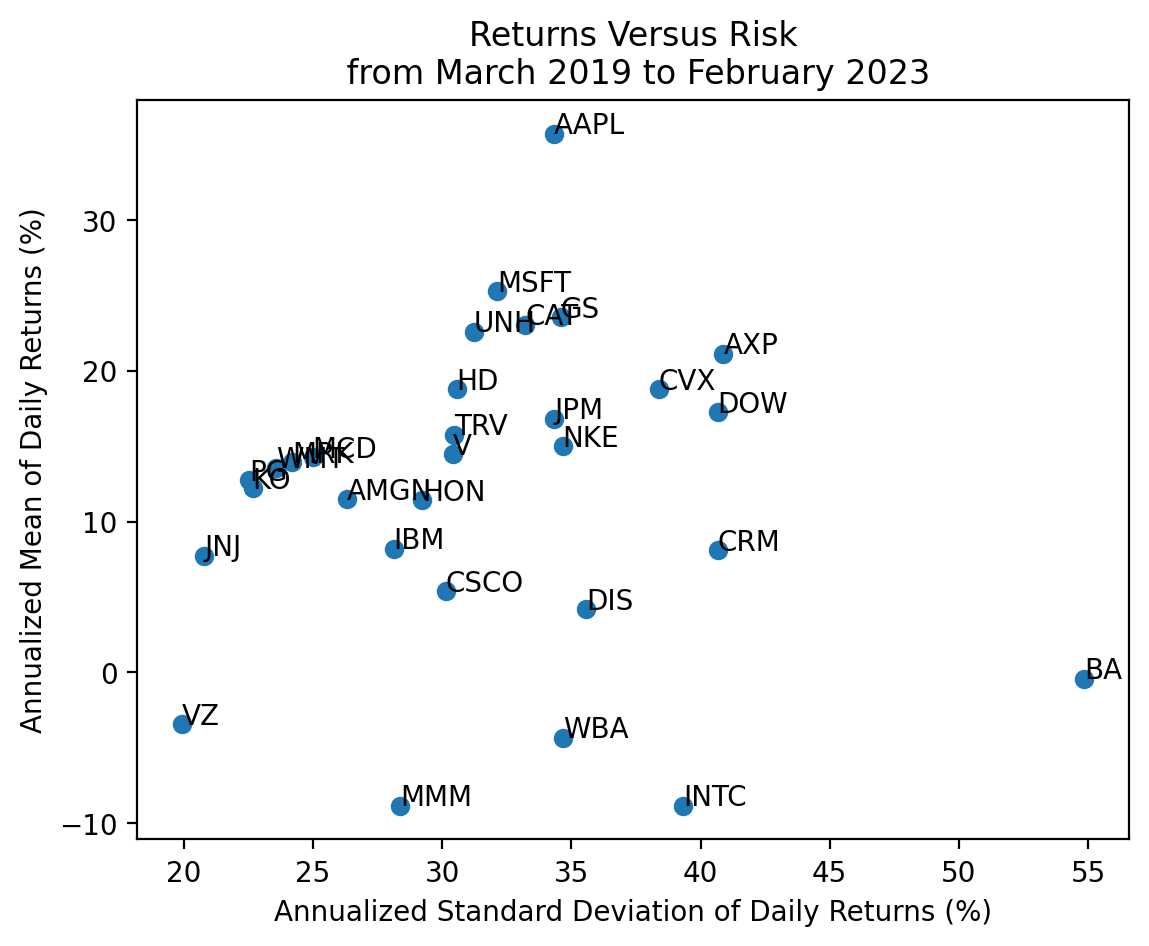

In [14]:
plot_many(returns_2)

***THERE IS NO RELATION BETWEEN RETURNS AND RISK FOR SINGLE STOCKS!***

In [15]:
np.corrcoef(returns_2.mean(), returns_2.std())

array([[1.   , 0.004],
       [0.004, 1.   ]])

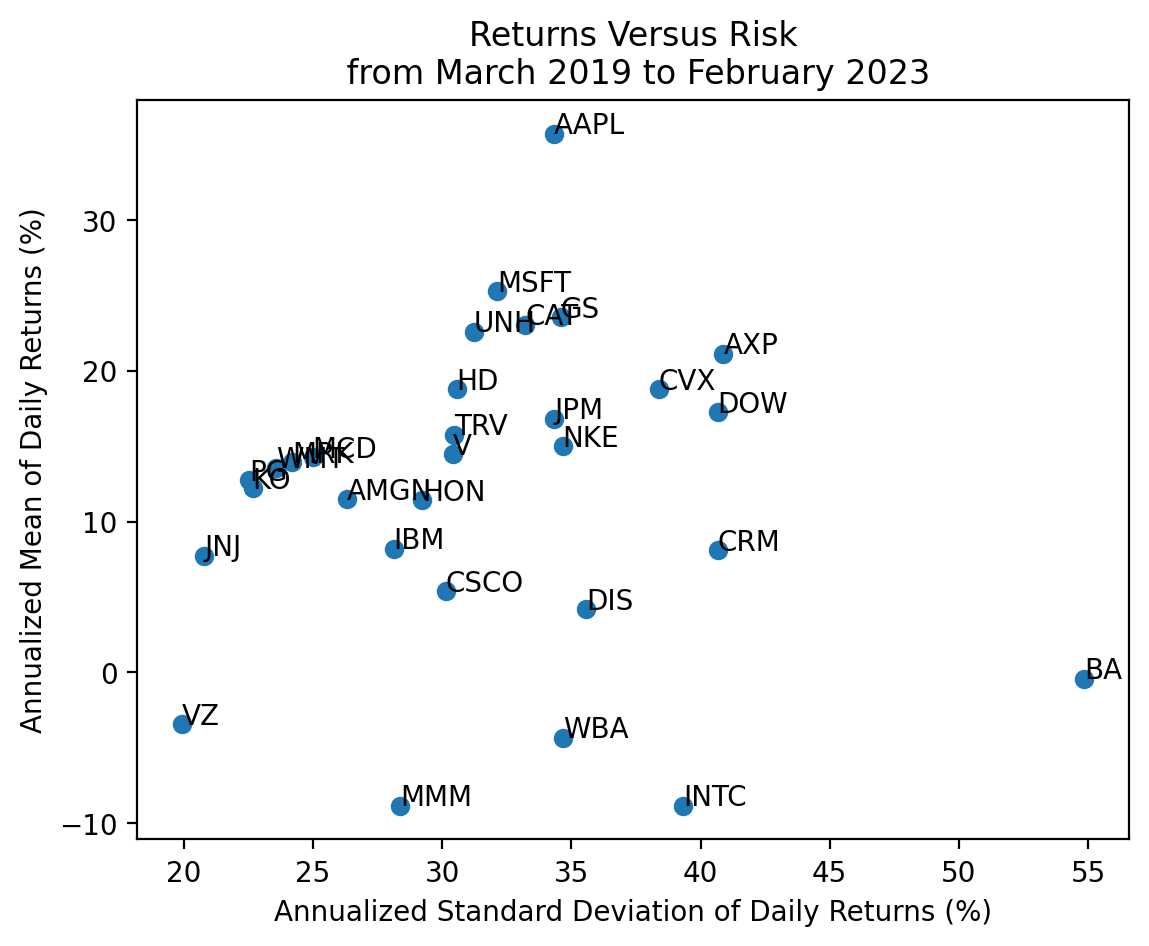

In [16]:
returns_2.pipe(plot_many)

### Calculate total returns for the stocks in the DJIA

We can use the `.prod()` method to compound returns as $1 + R_T = \prod_{t=1}^T (1 + R_t)$.
Technically, we should write $R_T$ as $R_{0,T}$, but we typically omit the subscript $0$.

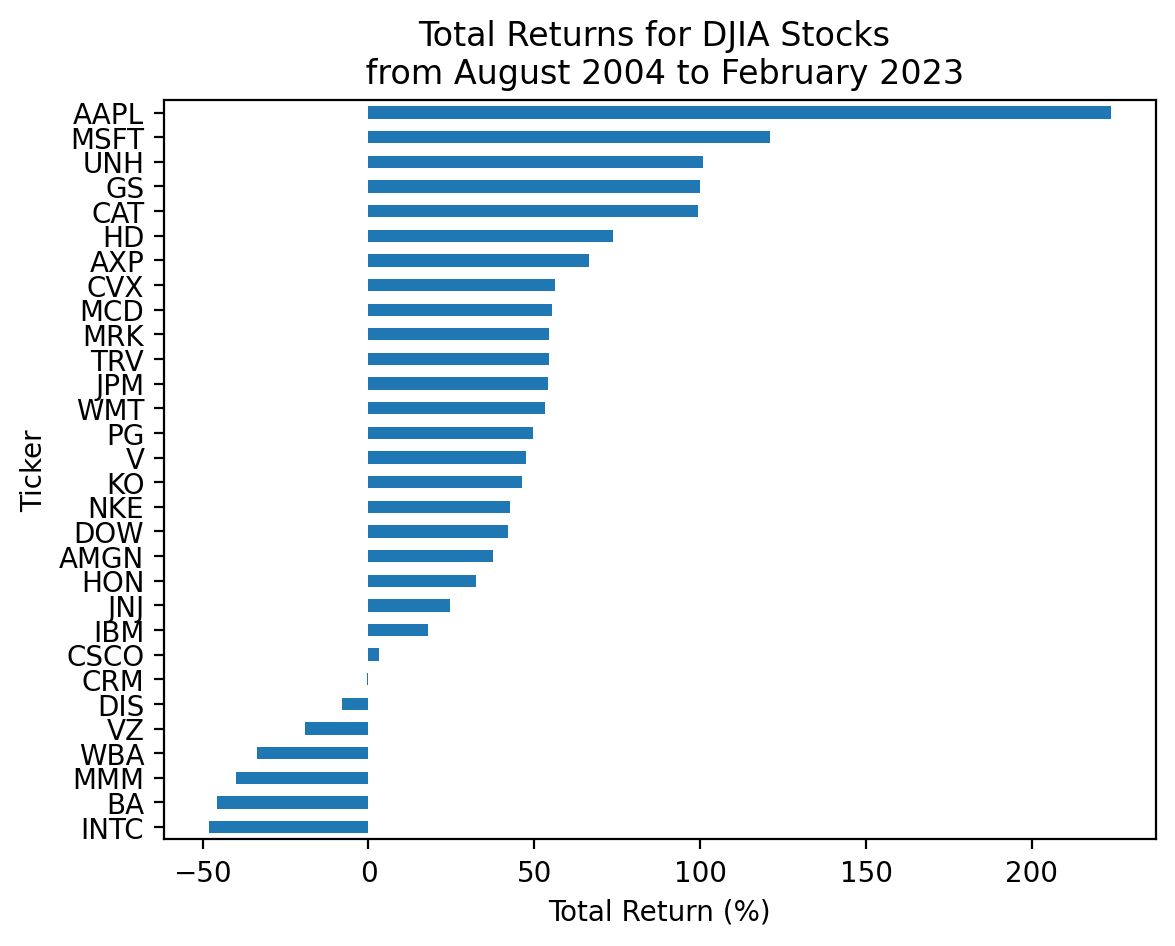

In [17]:
(
    returns_2
    .add(1)
    .prod()
    .sub(1)
    .mul(100)
    .sort_values()
    .plot(kind='barh')
)
plt.xlabel('Total Return (%)')
plt.title(f'Total Returns for DJIA Stocks \n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')
plt.show()

### Plot the distribution of total returns for the stocks in the DJIA

We can plot a histogram, using either the `plt.hist()` function or the `.plot(kind='hist')` method.

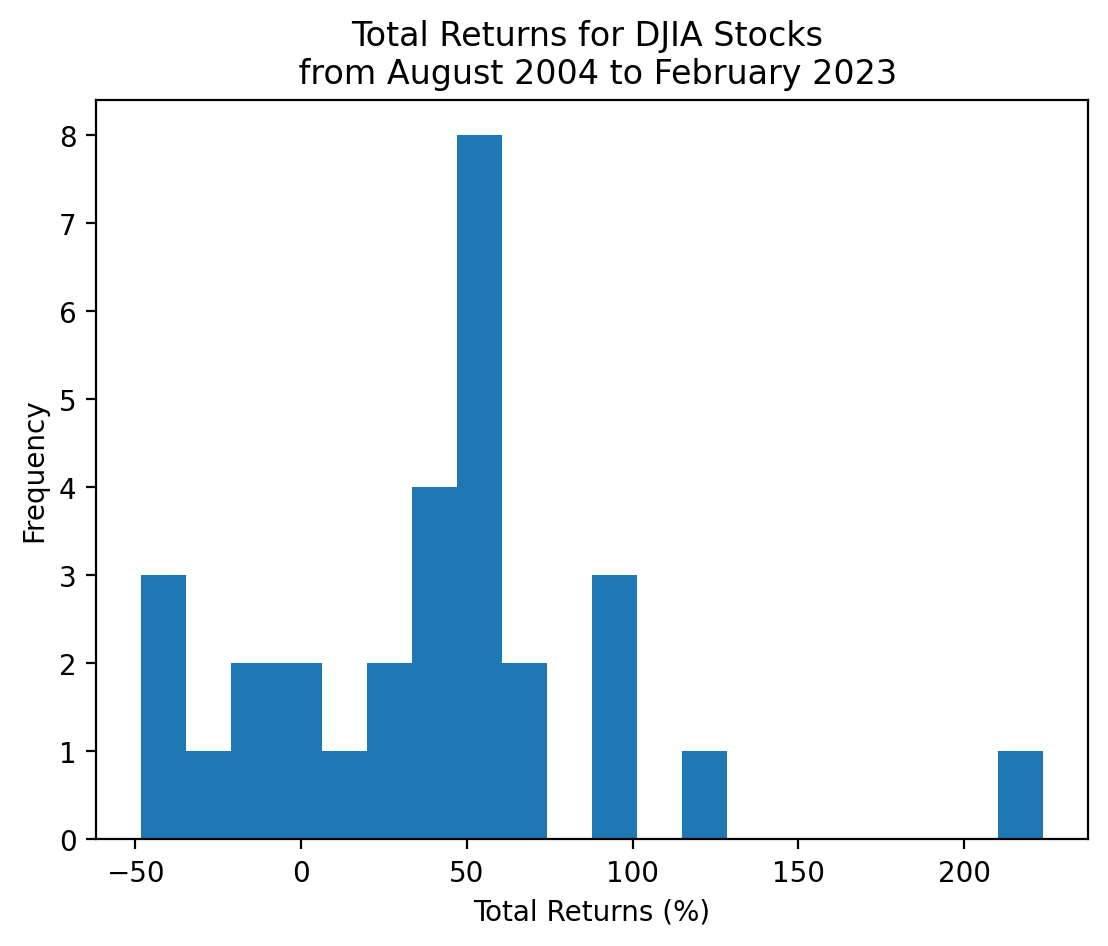

In [18]:
(
    returns_2
    .add(1)
    .prod()
    .sub(1)
    .mul(100)
    .plot(kind='hist', bins=20)
)
plt.xlabel('Total Returns (%)')
plt.title(f'Total Returns for DJIA Stocks \n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')
plt.show()

### Which stocks have the minimum and maximum total returns?

In [19]:
returns_2_total = returns_2.add(1).prod().sub(1)

In [20]:
returns_2_total.min()

-0.4811

In [21]:
returns_2_total.idxmin()

'INTC'

In [22]:
returns_2_total.max()

2.2376

In [23]:
returns_2_total.idxmax()

'AAPL'

In [24]:
returns_2_total.sort_values().iloc[[0, -1]]

Ticker
INTC   -0.4811
AAPL    2.2376
dtype: float64

In [25]:
returns_2_total.nsmallest()

Ticker
INTC   -0.4811
BA     -0.4564
MMM    -0.3982
WBA    -0.3352
VZ     -0.1918
dtype: float64

In [26]:
returns_2_total.nlargest()

Ticker
AAPL   2.2376
MSFT   1.2104
UNH    1.0085
GS     0.9988
CAT    0.9935
dtype: float64

### Plot the cumulative returns for the stocks in the DJIA

We can use the cumulative product method `.cumprod()` to calculate the right hand side of the formula above.

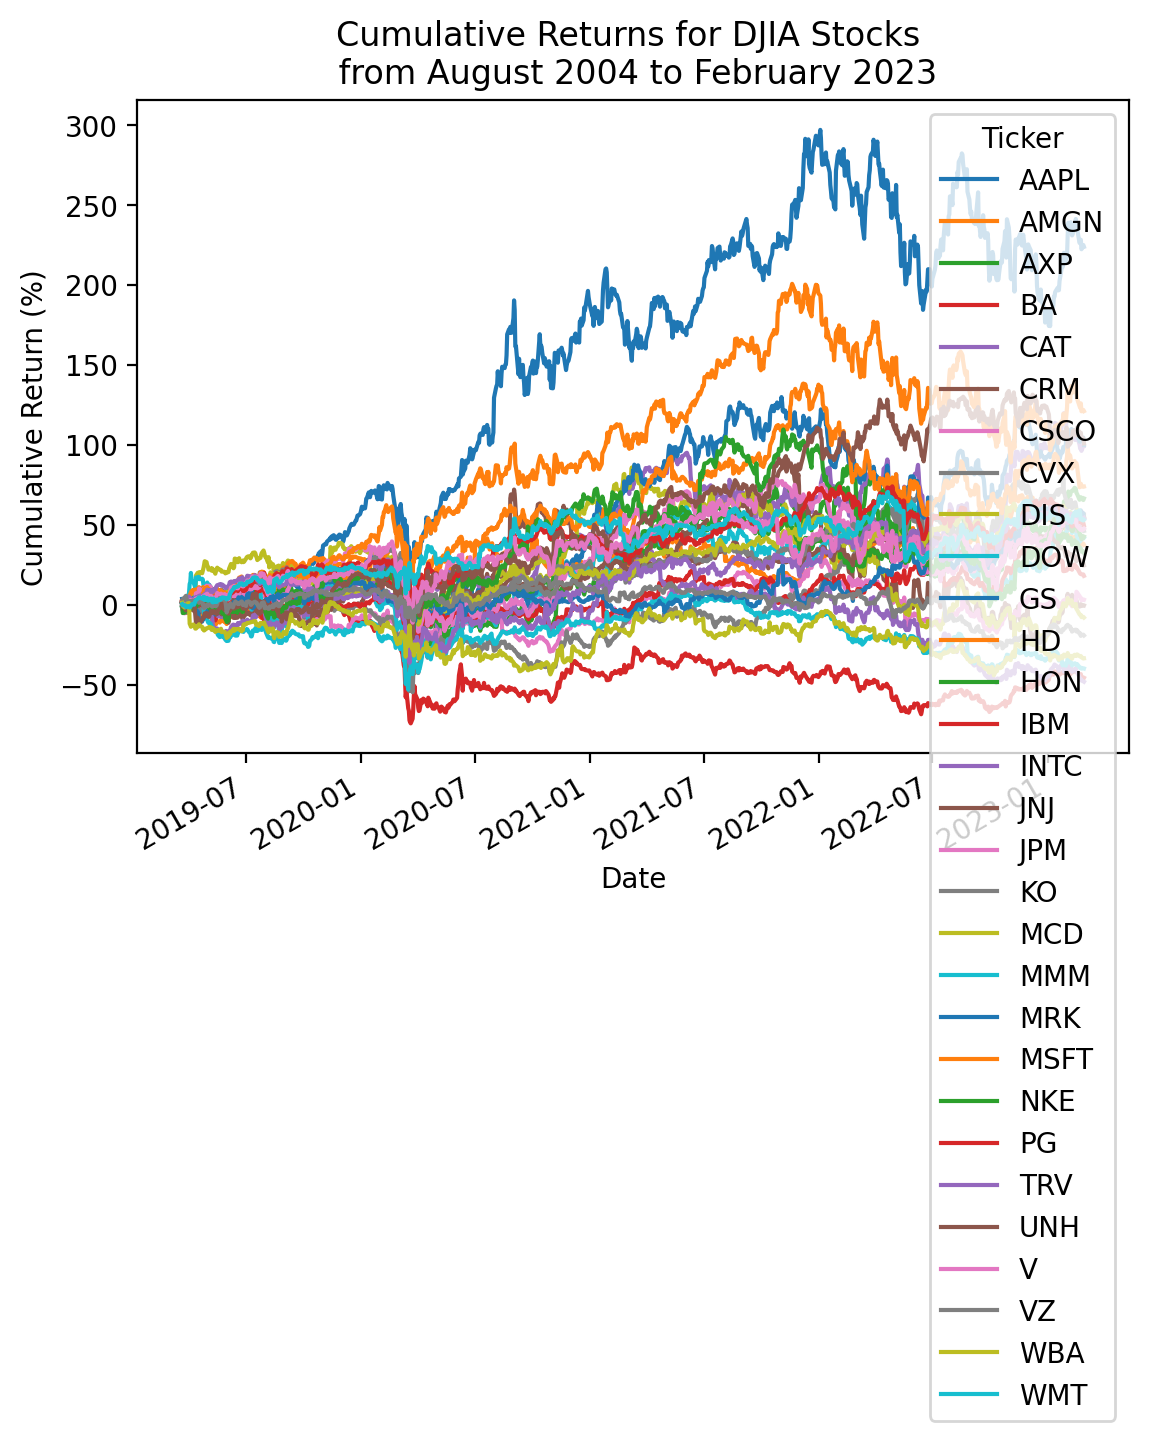

In [27]:
(
    returns_2
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns for DJIA Stocks \n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')
plt.show()

### Repeat the plot above with only the minimum and maximum total returns

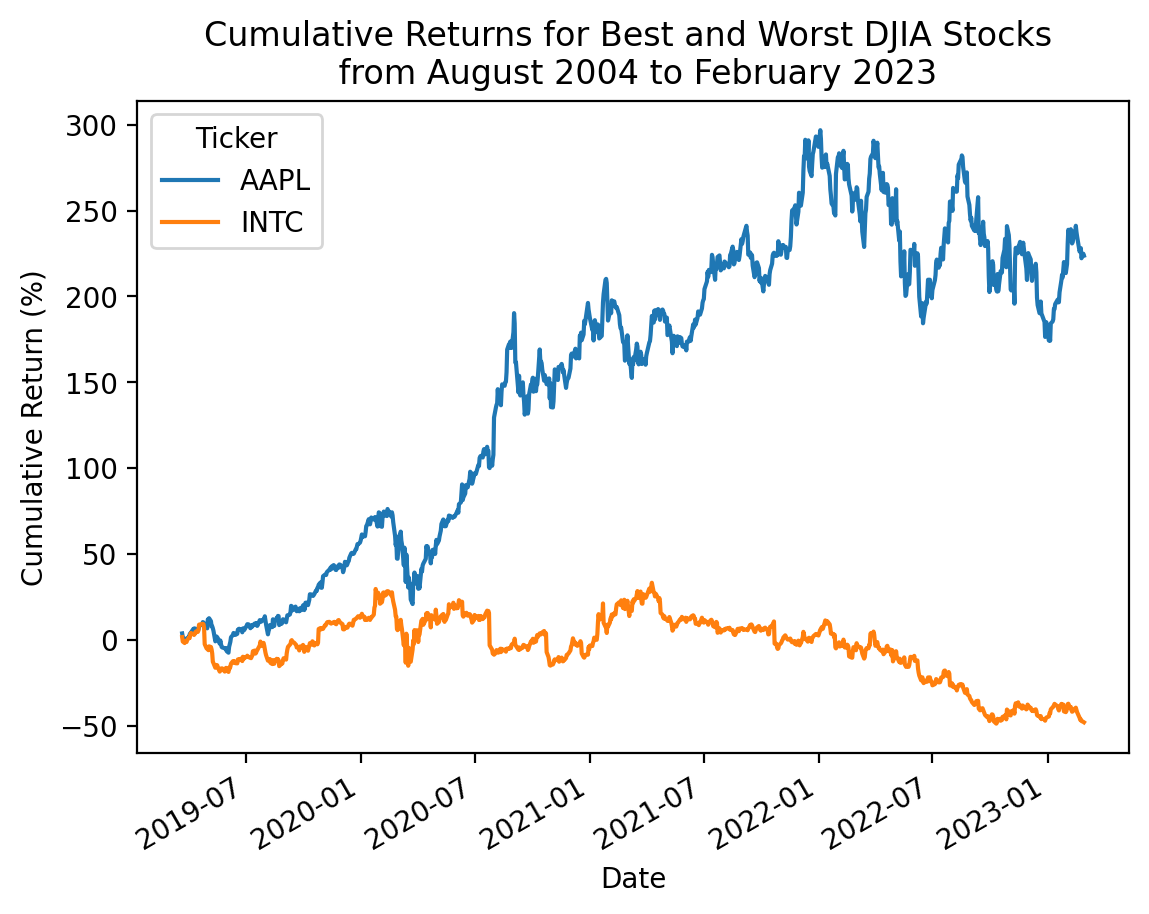

In [28]:
(
    returns_2[[returns_2_total.idxmax(), returns_2_total.idxmin()]]
    .add(1)
    .cumprod()
    .sub(1)
    .mul(100)
    .plot()
)
plt.ylabel('Cumulative Return (%)')
plt.title(f'Cumulative Returns for Best and Worst DJIA Stocks \n from {returns.index[0]:%B %Y} to {returns.index[-1]:%B %Y}')
plt.show()